In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/cars.csv')

In [ ]:
data[data['Car'] == 'Mercedes']

,Car,Model,Volume,Weight,CO2
7,Mercedes,A-Class,1500,1365,92
22,Mercedes,C-Class,2100,1365,99
25,Mercedes,CLA,1500,1465,102
30,Mercedes,E-Class,2100,1605,115
35,Mercedes,SLK,2500,1395,120


In [ ]:
data.drop('Model',axis = 1, inplace=True)


In [ ]:
data['Car'].unique()

array(['Toyoty', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Hundai', 'Opel',
       'BMW', 'Mazda', 'Volvo'], dtype=object)

In [ ]:
data['Car'].replace('Toyoty','Toyota',inplace=True)
data['Car'].replace('Hundai', 'Hyundai',inplace=True)

In [ ]:
data['Car'].unique()

array(['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW', 'Mercedes',
       'Ford', 'Audi', 'Hyundai', 'Suzuki', 'Honda', 'Opel', 'BMW',
       'Mazda', 'Volvo'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(data['Car'])
a

array([13,  9, 11,  2,  8, 14, 11,  7,  3,  0,  5, 12,  3,  4,  5, 10,  1,
        6, 11,  3,  3, 10,  7, 11, 15,  7,  0,  0, 15,  1,  7, 15,  3,  1,
       10,  7])

In [ ]:
data['Car_Code'] = a

In [ ]:
CarCode = pd.DataFrame(data['Car'],data['Car_Code'])
CarCode.head()

,Car
Car_Code,
13,Honda
9,Audi
11,Suzuki
2,Skoda
8,Ford


In [ ]:
data.drop('Car', axis=1, inplace=True)
data.head()

,Volume,Weight,CO2,Car_Code
0,1000,790,99,13
1,1200,1160,95,9
2,1000,929,95,11
3,900,865,90,2
4,1500,1140,105,8


In [ ]:
X = data.iloc[:,[0,1,3]]
y = (data.iloc[:,2]).to_numpy().reshape([len(X),1])

In [ ]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones, X), axis=1)
theta = np.zeros([1,4])
learning_rate = 0.01
interations = 1000

In [ ]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [ ]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [ ]:
theta_best, cost_history = gradientDescent(X, y, theta, 1000, 0.01)


array([[102.02337311,   3.02088093,   1.99162484,   0.88710501]])

Text(0.5, 1.0, 'Error vs. Training Epoch')

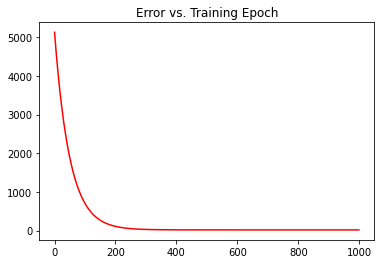

In [ ]:
iters = 1000
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost_history, 'r')  

ax.set_title('Error vs. Training Epoch')  